# 5. 인공신경망
## 5.1 다층 퍼셉트론
### 5.1.1 선형 회귀

In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)

In [3]:
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc = nn.Linear(1, 1, bias=True)
    
    def forward(self, x): 
        y = self.fc(x)
      
        return y  

In [4]:
model = LinearRegressor()

In [5]:
learning_rate = 1e-3
# 손실함수, 실제 값, 예측 값, 손실을 구하는 함수.
criterion = nn.MSELoss()
# 최적화, 확률적 경사 하강법, 데이터를 확률적으로 살펴보면서, 위에서, 아래 방향으로
# 내려 오면서, 최적 파라미터 값을 찾는 방법을 말함.
# learning_rate 내려오는 보폭.
# 최적화,
# 비유, 산에서, 출발지 내려오는 길
# 1번길, 경사가 급하고,
# 2번길, 완만하고,
# 3번길, 돌맹이가 조금 많고,
# 4번길, 풀, 나무 빽빽함.
# 결론, 웨이트 값의 최솟값을 찾아가는 과정.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
loss_stack = [] # 손실 값들의 조사를 해서, 실행 할 때마다 변화율을 보기.
for epoch in range(1001):

    # 매 실행시 마다, 초기기화를 해서, 최적값을 조사.
    optimizer.zero_grad()

    # 예측값
    y_hat = model(x)
    # 실제값 과 예측값을 비교.
    loss = criterion(y_hat,y)
    # 역전파, 최적화 과정, SGD 이용해서, 최적 웨이트 찾는데,
    # 도구, 미분이라는 도구 이용해서, 최소값을 찾아가기.
    # y = wx + b, : w, b .웨이트를 업데이트 함.
    loss.backward()
    # 그 다음 웨이트를 업데이트 하는 과정.
    optimizer.step()
    # 손실 값을 기록하기.
    loss_stack.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:15.021095275878906
Epoch 100:1.0422794818878174
Epoch 200:0.09962266683578491
Epoch 300:0.03439091518521309
Epoch 400:0.028403837233781815
Epoch 500:0.02658306621015072
Epoch 600:0.025202233344316483
Epoch 700:0.023992544040083885
Epoch 800:0.022920209914445877
Epoch 900:0.021968571469187737
Epoch 1000:0.02112409844994545


In [7]:
with torch.no_grad():
    y_hat = model(x)

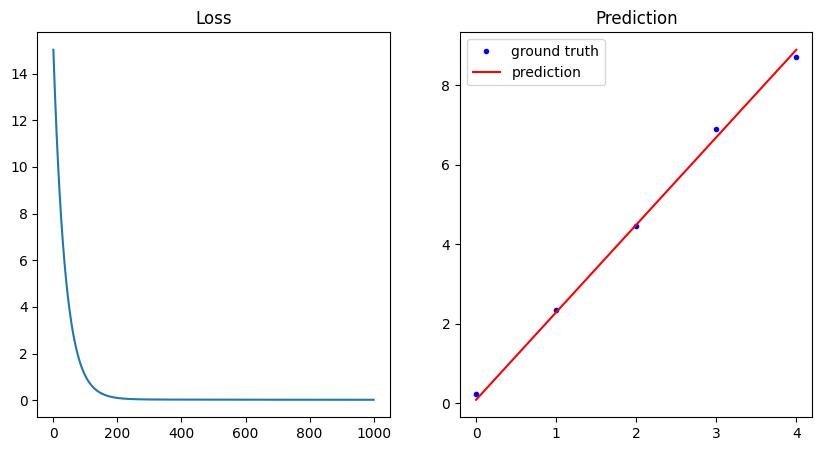

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()